C:\Users\tusha\AppData\Local\Temp\ipykernel_19476\3007322814.py:98: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for collection in CF.collections:
C:\Users\tusha\AppData\Local\Temp\ipykernel_19476\3007322814.py:103: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for collection in CS.collections:
C:\Users\tusha\AppData\Local\Temp\ipykernel_19476\3007322814.py:108: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for collection in CF.collections:
C:\Users\tusha\AppData\Local\Temp\ipykernel_19476\3007322814.py:113: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for collection in CS.collections:


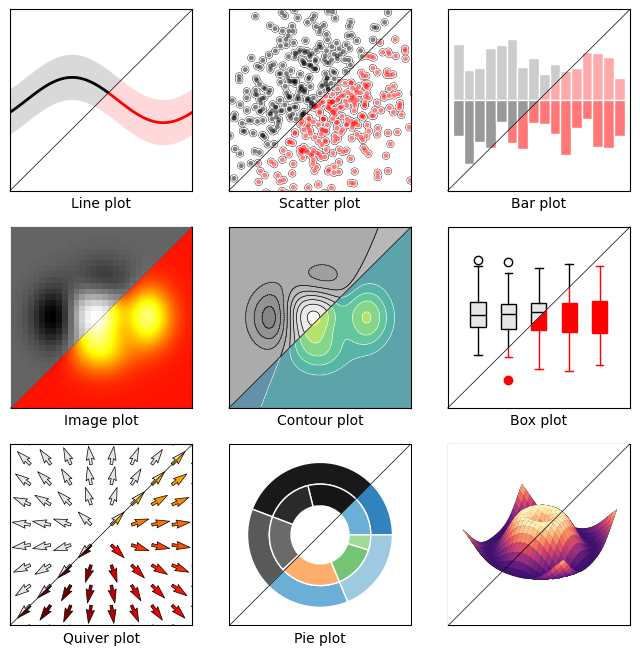

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.text import Text
from matplotlib.lines import Line2D
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Rectangle, Polygon

plt.rcParams['figure.dpi'] = 100

def clip_path(ax):
    T1 = [(0,0),(0,1),(1,1)]
    T2 = [(0,0),(1,0),(1,1)]
    clip1 = Polygon(T1, closed=True, transform=ax.transAxes,
                   edgecolor='None', facecolor='None')
    clip2 = Polygon(T2, closed=True, transform=ax.transAxes,
                   edgecolor='None', facecolor='None')

    line = Line2D([0, 1], [0, 1], transform=ax.transAxes, linewidth=0.5,
                  color="black", clip_on=False, zorder=50)
    ax.add_artist(line)

    return clip1, clip2

    
def scatter(ax):
    np.random.seed(123)
    n = 500
    X = np.random.normal(0, 0.5, n)
    Y = np.random.normal(0, 0.5, n)
    S = 25

    clip1, clip2 = clip_path(ax)
    
    ax.scatter(X, Y, S, clip_path=clip1,
               linewidth=0.75, facecolor="None",  edgecolor=".25")
    ax.scatter(X, Y, S, clip_path=clip1,
               linewidth=0.00, facecolor="white", edgecolor="None")
    ax.scatter(X, Y, S/2, clip_path=clip1,
               linewidth=0.00, facecolor="black", edgecolor="None", alpha=0.5)

    ax.scatter(X, Y, S, clip_path=clip2,
               linewidth=0.75, facecolor="None",  edgecolor=".25")
    ax.scatter(X, Y, S, clip_path=clip2,
               linewidth=0.00, facecolor="white", edgecolor="None")
    ax.scatter(X, Y, S/2, clip_path=clip2,
               linewidth=0.00, facecolor="red", edgecolor="None", alpha=0.5)

    ax.set_xlabel("Scatter plot")
    

def lineplot(ax):
    ax.set_xlabel("Line plot")

    clip1, clip2 = clip_path(ax)
    
    X = np.linspace(-1,1,100)
    Y = 0.25*np.cos(1+np.pi*X)
    ax.plot(X, Y, color="black", linewidth=2, clip_path=clip1)
    ax.fill_between(X, Y+0.25, Y-0.25, clip_path=clip1,
                    facecolor="black", edgecolor="None", alpha=0.15)

    X = np.linspace(-1,1,100)
    Y = 0.25*np.cos(1+np.pi*X)
    ax.plot(X, Y, color="red", linewidth=2, clip_path=clip2)
    ax.fill_between(X, Y+0.25, Y-0.25, clip_path=clip2,
                    facecolor="red", edgecolor="None", alpha=0.15)
    

def quiverplot(ax):
    clip1, clip2 = clip_path(ax)
    
    n = 10
    X,Y = np.mgrid[0:n, 0:n]
    X,Y = 2*X/(n-1)-1, 2*Y/(n-1)-1
    T = np.arctan2(Y, X)
    U, V = np.cos(T), np.sin(T)
    ax.quiver(X, Y, 0.1*U, 0.1*V, scale=1, width=0.015, clip_path=clip1,
              edgecolor='black', facecolor='.9', linewidth=.5)

    ax.quiver(X, Y, 0.1*U, 0.1*V, T-1, scale=1, width=0.015, clip_path=clip2,
              edgecolor='black', linewidth=.5, cmap="hot")

    ax.set_xlabel("Quiver plot")

def contourplot(ax):

    clip1, clip2 = clip_path(ax)
    
    def f(x,y): return (1-x/2+x**5+y**3)*np.exp(-x**2-y**2)
    n = 100
    x = np.linspace(-3,3,n)
    y = np.linspace(-3,3,n)
    X,Y = np.meshgrid(x,y)
    Z = f(X,Y)

    CF = ax.contourf(Z, 10, extent=[-1,+1,-1,+1], alpha=.5, 
                     origin="upper", cmap="gray", zorder=-10)
    for collection in CF.collections:
        collection.set_clip_path(clip1)
   
    CS = ax.contour(Z, 10, extent=[-1,+1,-1,+1], 
                    colors="black", linewidths=.5, origin="upper")
    for collection in CS.collections:
        collection.set_clip_path(clip1)

    CF = ax.contourf(Z, 10, extent=[-1,+1,-1,+1], alpha=.75, 
                     origin="upper", cmap="viridis", zorder=-10)
    for collection in CF.collections:
        collection.set_clip_path(clip2)
    
    CS = ax.contour(Z, 10, extent=[-1,+1,-1,+1], 
                    colors="white", linewidths=.5, origin="upper")
    for collection in CS.collections:
        collection.set_clip_path(clip2)

    ax.set_xlabel("Contour plot")

def imageplot(ax):
    def f(x,y): return (1-x/2+x**5+y**3)*np.exp(-x**2-y**2)
    n = 32
    x = np.linspace(-3,3,n)
    y = np.linspace(-3,3,n)
    X,Y = np.meshgrid(x,y)
    Z = f(X,Y)

    clip1, clip2 = clip_path(ax)
    ax.imshow(Z, extent=[-1,+1,-1,+1], origin="upper", zorder=50,
              cmap="gray", interpolation="nearest", clip_path=clip1)
    ax.imshow(Z, extent=[-1,+1,-1,+1], origin="upper", 
              cmap="hot", interpolation="bicubic", clip_path=clip2)


    ax.set_xlabel("Image plot")

def pieplot(ax):
    clip1, clip2 = clip_path(ax)

    size = 0.3
    vals = np.array([[60., 32.], [37., 40.], [29., 10.]])

    cmap = plt.get_cmap("gray")
    outer_colors = cmap(.1+np.arange(3)/4)
    inner_colors = cmap(np.array([1, 2, 5, 6, 9, 10])/12)

    patches, _ = ax.pie(vals.sum(axis=1), radius=1, colors=outer_colors,
                        wedgeprops=dict(width=size, edgecolor='w'))
    for patch in patches:
        patch.set_clip_on(True)
        patch.set_clip_path(clip1)
    patches, _ = ax.pie(vals.flatten(), radius=1-size, colors=inner_colors,
                        wedgeprops=dict(width=size, edgecolor='w'))
    for patch in patches:
        patch.set_clip_on(True)
        patch.set_clip_path (clip1)

    cmap = plt.get_cmap("tab20c")
    outer_colors = cmap(+np.arange(3))
    inner_colors = cmap(np.array([1, 2, 5, 6, 9, 10]))
    patches, _ = ax.pie(vals.sum(axis=1), radius=1, colors=outer_colors,
                        wedgeprops=dict(width=size, edgecolor='w'))
    for patch in patches:
        patch.set_clip_on(True)
        patch.set_clip_path(clip2)
    patches, _ = ax.pie(vals.flatten(), radius=1-size, colors=inner_colors,
                        wedgeprops=dict(width=size, edgecolor='w'))
    for patch in patches:
        patch.set_clip_on(True)
        patch.set_clip_path (clip2)
    
    rect = Rectangle((0,0), 1, 1, transform=ax.transAxes, linewidth=0.75,
                     edgecolor="black", facecolor="None", clip_on=False)
    ax.add_artist(rect)

    ax.set_xlabel("Pie plot")

def threedplot(ax):
    ax.set_axis_off()
    ax.set_xlim(-1, 1), ax.set_ylim(-1, 1), ax.set_zlim(-2, 2)
    
    X, Y = np.meshgrid(np.linspace(-1, 1, 25), np.linspace(-1, 1, 25))
    Z = np.sin(5 * np.sqrt(X**2 + Y**2))

    # Remove clip_path from plot_surface
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap="gray", 
                    linewidth=.25, edgecolor="black", vmin=-1.5, vmax=1)
    
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap="magma", 
                    linewidth=0, edgecolor="black", vmin=-1.5, vmax=1)

    line = Line2D([0, 1], [0, 1], transform=ax.transAxes, linewidth=0.5,
                  color="black", clip_on=False, zorder=50)
    ax.add_artist(line)

    ax.set_xlabel("3D plot")

    
    
def barplot(ax):
    clip1, clip2 = clip_path(ax)

    n = 16
    X = np.arange(n)
    Y1 = (1-0.25*X/n) * np.random.uniform(0.25, 0.75, n)
    Y2 = (1-0.25*X/n) * np.random.uniform(0.25, 0.75, n)
    ax.bar(X, +Y1, 1, facecolor='#cccccc', edgecolor='white', clip_path=clip1)
    ax.bar(X, -Y2, 1, facecolor='#999999', edgecolor='white', clip_path=clip1)
    ax.bar(X, +Y1, 1, facecolor='#ffaaaa', edgecolor='white', clip_path=clip2)
    ax.bar(X, -Y2, 1, facecolor='#ff7777', edgecolor='white', clip_path=clip2)
    ax.set_xlim(-1,n)
    ax.set_xlabel("Bar plot")

def boxplot(ax):
    clip1, clip2 = clip_path(ax)

    n = 5
    data = np.random.normal(0, .25, (100,n))

    bplots = ax.boxplot(data, patch_artist=True)
    for patch in bplots['boxes']:
        patch.set_facecolor("0.9")
    for line in bplots['medians']:
        line.set_color("black")
    for element in ["boxes","medians","whiskers", "caps", "fliers","means"]:
        for item in bplots[element]:
            item.set_clip_path(clip1)

    bplots = ax.boxplot(data, patch_artist=True)
    
    for patch in bplots['boxes']:
        patch.set_facecolor("0.9")
    for line in bplots['medians']:
        line.set_color("black")
    for element in ["boxes","medians","whiskers", "caps", "fliers","means"]:
        for item in bplots[element]:
            item.set_color("red")
            try:
                item.set_markerfacecolor ("red")
                item.set_markeredgecolor ("red")
            except:
                pass
            item.set_clip_path(clip2)

            
    ax.set_xlim(0,n+1), ax.set_xticks([])
    ax.set_xlabel("Box plot")


fig, axes = plt.subplots(3, 3, figsize=(8, 8))
for ax in axes.ravel():
    ax.set(xticks=[], yticks=[], xlim=[-1,1], ylim=[-1,1])
axes[2,2] = plt.subplot(339, projection="3d")

lineplot(axes[0,0])
scatter(axes[0,1])
barplot(axes[0,2])

imageplot(axes[1,0])
contourplot(axes[1,1])
boxplot(axes[1,2])

quiverplot(axes[2,0])
pieplot(axes[2,1])
threedplot(axes[2,2])

plt.savefig("catalogue.pdf")
plt.show()

In [3]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec # Alignments 

import seaborn as sns # theme & dataset
print(f"Matplotlib Version : {mpl.__version__}")
print(f"Seaborn Version : {sns.__version__}")

# for visualization samples
import pandas as pd

netflix_titles = pd.read_csv("netflix_titles.csv")

Matplotlib Version : 3.8.0
Seaborn Version : 0.12.2


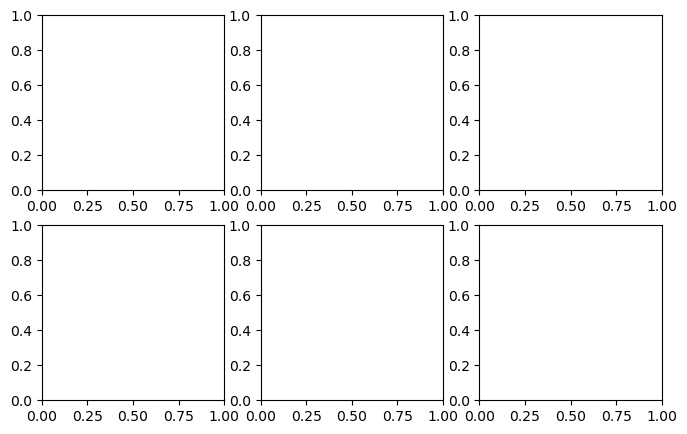

In [4]:
fig, axes = plt.subplots(2, 3, figsize=(8, 5))
plt.show()

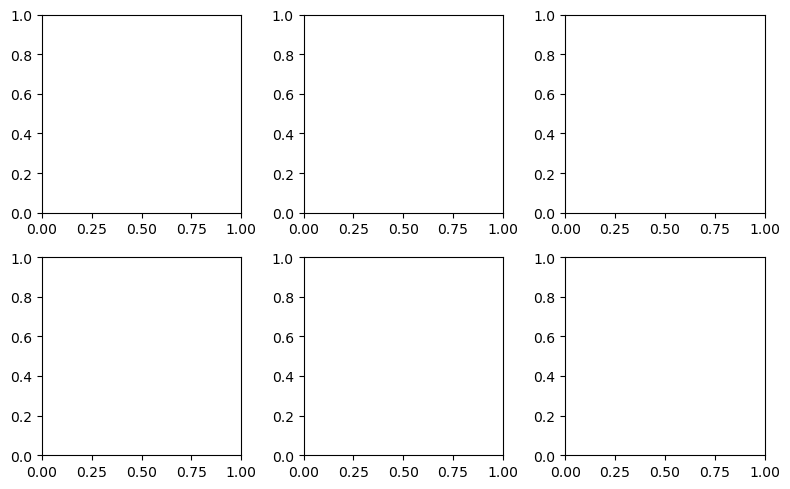

In [5]:
fig, axes = plt.subplots(2, 3, figsize=(8, 5))
plt.tight_layout()
plt.show()

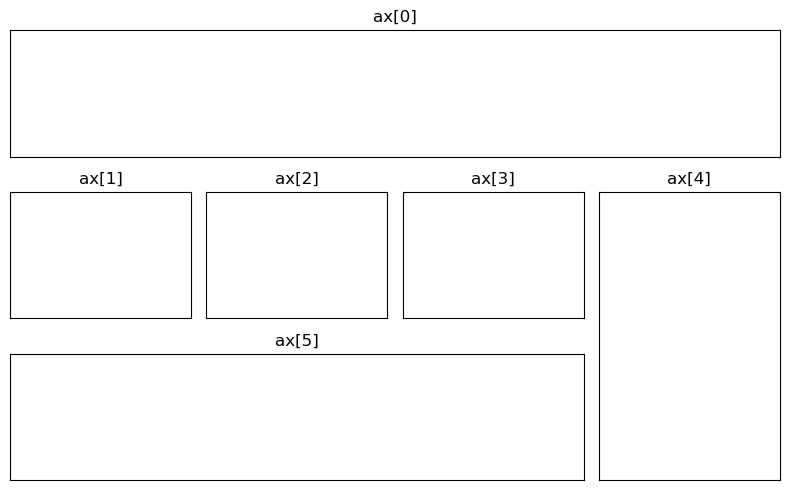

In [6]:
# with subplot2grid

fig = plt.figure(figsize=(8, 5)) # initialize figure

ax = [None for _ in range(6)] # list to save many ax for setting parameter in each

ax[0] = plt.subplot2grid((3,4), (0,0), colspan=4)
ax[1] = plt.subplot2grid((3,4), (1,0), colspan=1)
ax[2] = plt.subplot2grid((3,4), (1,1), colspan=1)
ax[3] = plt.subplot2grid((3,4), (1,2), colspan=1)
ax[4] = plt.subplot2grid((3,4), (1,3), colspan=1,rowspan=2)
ax[5] = plt.subplot2grid((3,4), (2,0), colspan=3)


for ix in range(6): 
    ax[ix].set_title('ax[{}]'.format(ix)) # make ax title for distinguish:)
    ax[ix].set_xticks([]) # to remove x ticks
    ax[ix].set_yticks([]) # to remove y ticks
    
fig.tight_layout()
plt.show()

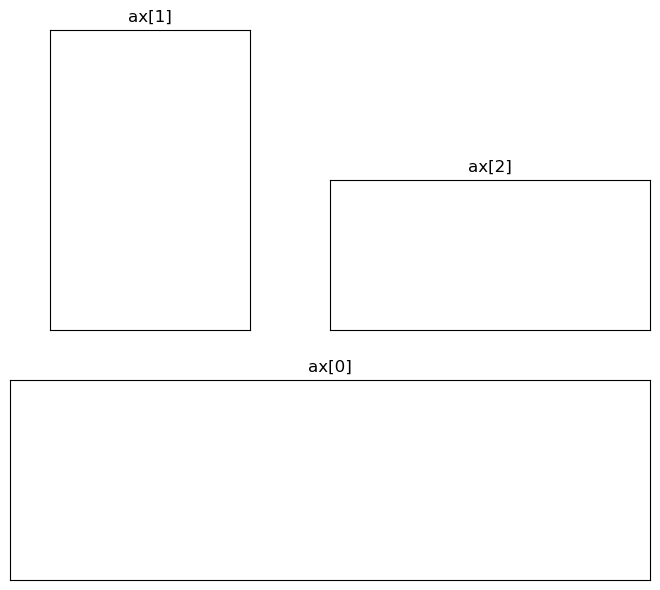

In [7]:
fig = plt.figure(figsize=(8, 5))

ax = [None for _ in range(3)]


ax[0] = fig.add_axes([0.1,0.1,0.8,0.4]) # x, y, dx, dy
ax[1] = fig.add_axes([0.15,0.6,0.25,0.6])
ax[2] = fig.add_axes([0.5,0.6,0.4,0.3])

for ix in range(3):
    ax[ix].set_title('ax[{}]'.format(ix))
    ax[ix].set_xticks([])
    ax[ix].set_yticks([])

plt.show()

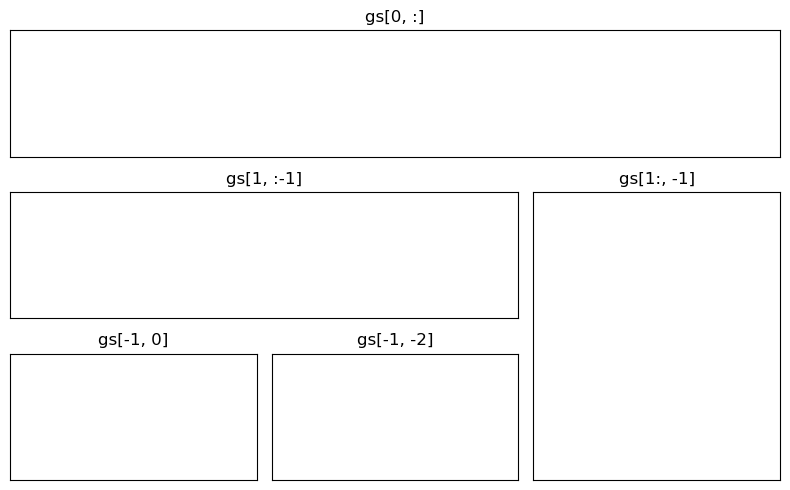

In [8]:
fig = plt.figure(figsize=(8, 5))

gs = fig.add_gridspec(3, 3) # make 3 by 3 grid (row, col)

ax = [None for _ in range(5)]

ax[0] = fig.add_subplot(gs[0, :]) 
ax[0].set_title('gs[0, :]')

ax[1] = fig.add_subplot(gs[1, :-1])
ax[1].set_title('gs[1, :-1]')

ax[2] = fig.add_subplot(gs[1:, -1])
ax[2].set_title('gs[1:, -1]')

ax[3] = fig.add_subplot(gs[-1, 0])
ax[3].set_title('gs[-1, 0]')

ax[4] = fig.add_subplot(gs[-1, -2])
ax[4].set_title('gs[-1, -2]')

for ix in range(5):
    ax[ix].set_xticks([])
    ax[ix].set_yticks([])

plt.tight_layout()
plt.show()

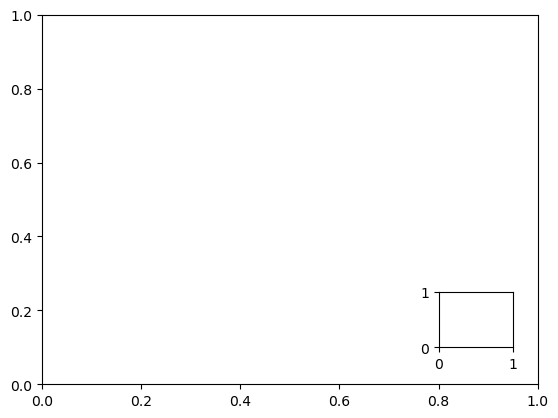

In [9]:
fig, ax = plt.subplots()
axin1 = ax.inset_axes([0.8, 0.1, 0.15, 0.15])
plt.show()

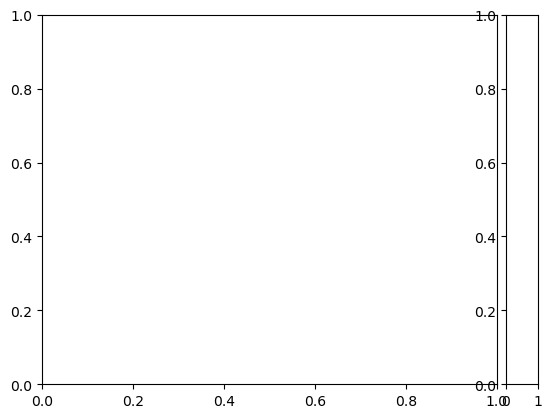

In [10]:
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

fig, ax = plt.subplots(1, 1)
ax_divider = make_axes_locatable(ax)

ax = ax_divider.append_axes("right", size="7%", pad="2%")
plt.show()

In [11]:
def cmap_plot(cmap_list, ctype):
    cmaps = cmap_list

    n = len(cmaps)

    fig = plt.figure(figsize=(8.25, n*.20), dpi=200)
    ax = plt.subplot(1, 1, 1, frameon=False, xlim=[0,10], xticks=[], yticks=[])
    fig.subplots_adjust(top=0.99, bottom=0.01, left=0.18, right=0.99)

    y, dy, pad = 0, 0.3, 0.08

    ticks, labels = [], []

    for cmap in cmaps[::-1]:
        Z = np.linspace(0,1,512).reshape(1,512)
        plt.imshow(Z, extent=[0,10,y,y+dy], cmap=plt.get_cmap(cmap))
        ticks.append(y+dy/2)
        labels.append(cmap)
        y = y + dy + pad

    ax.set_ylim(-pad,y)
    ax.set_yticks(ticks)
    ax.set_yticklabels(labels)

    ax.tick_params(axis='y', which='both', length=0, labelsize=5)
    plt.title(f'{ctype} Colormap', fontweight='bold', fontsize=8)
    plt.show()


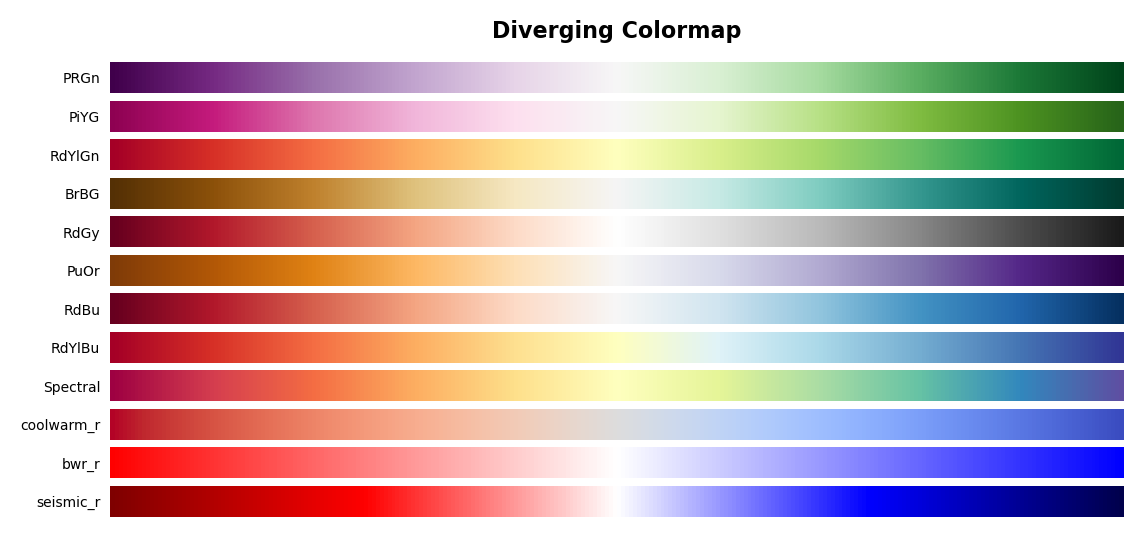

In [12]:
# _r mean reverse
diverge_cmap = ('PRGn', 'PiYG', 'RdYlGn', 'BrBG', 'RdGy', 'PuOr', 'RdBu', 'RdYlBu',  'Spectral', 'coolwarm_r', 'bwr_r', 'seismic_r')
cmap_plot(diverge_cmap, 'Diverging')

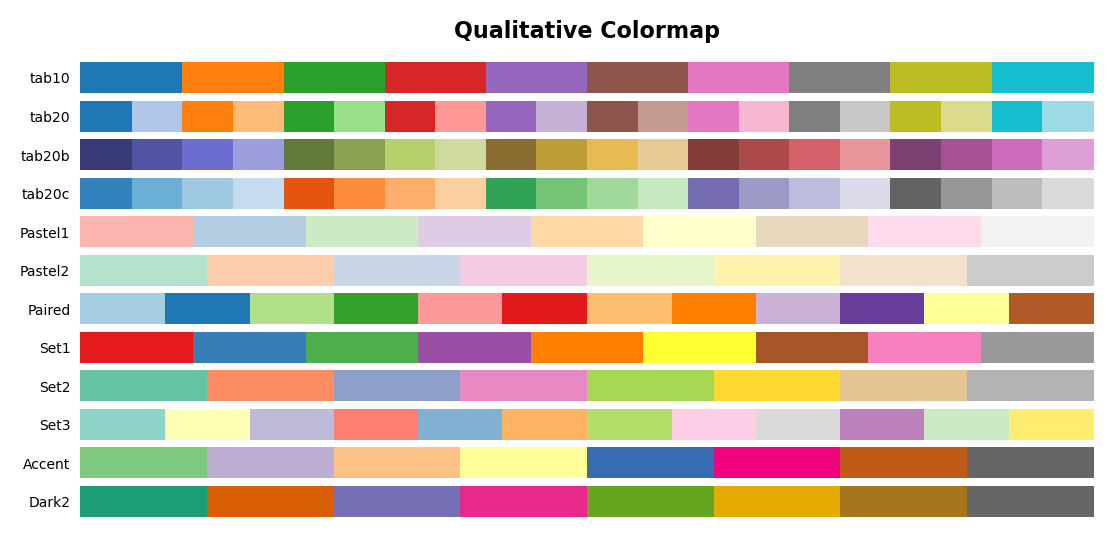

In [13]:
qualitative_cmap = ('tab10', 'tab20', 'tab20b', 'tab20c',
         'Pastel1', 'Pastel2', 'Paired',
         'Set1', 'Set2', 'Set3', 'Accent', 'Dark2' )

cmap_plot(qualitative_cmap, 'Qualitative')

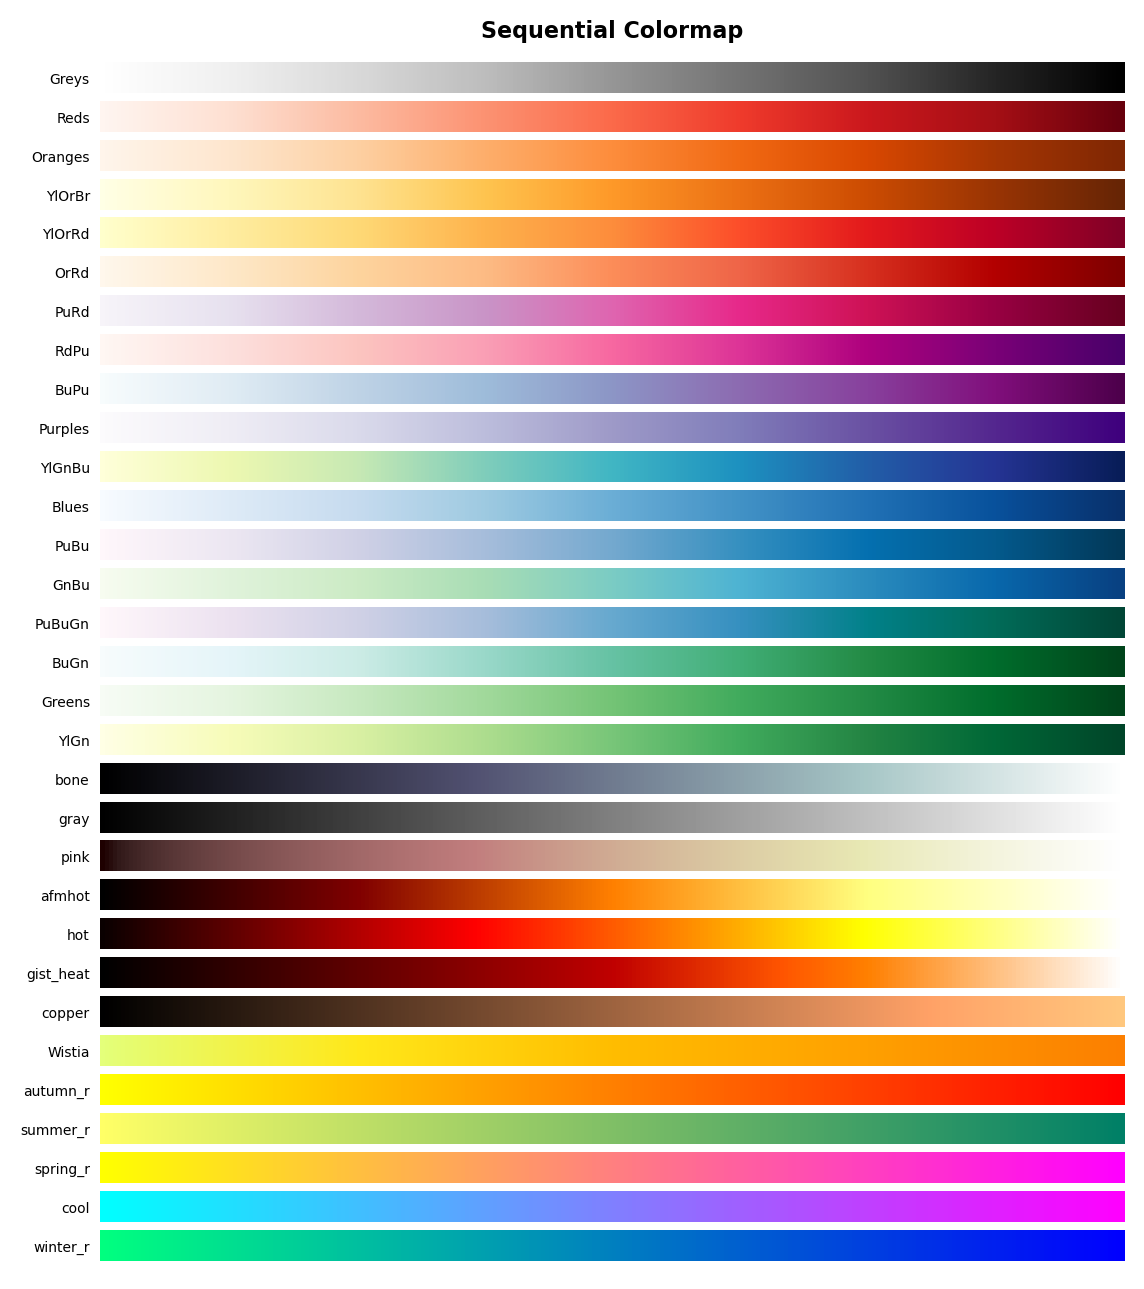

In [14]:
sequential_cmap = ('Greys', 'Reds', 'Oranges', 
         'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
         'Purples', 'YlGnBu', 'Blues', 'PuBu', 'GnBu', 'PuBuGn', 'BuGn',
         'Greens', 'YlGn','bone', 'gray', 'pink', 'afmhot', 'hot', 'gist_heat', 'copper', 
         'Wistia', 'autumn_r', 'summer_r', 'spring_r', 'cool', 'winter_r')            

cmap_plot(sequential_cmap, 'Sequential')

In [15]:
netflix_date = netflix_titles[['date_added']].dropna()
netflix_date['year'] = netflix_date['date_added'].apply(lambda x : x.split(', ')[-1])
netflix_date['month'] = netflix_date['date_added'].apply(lambda x : x.lstrip().split(' ')[0])

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]
df = netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T

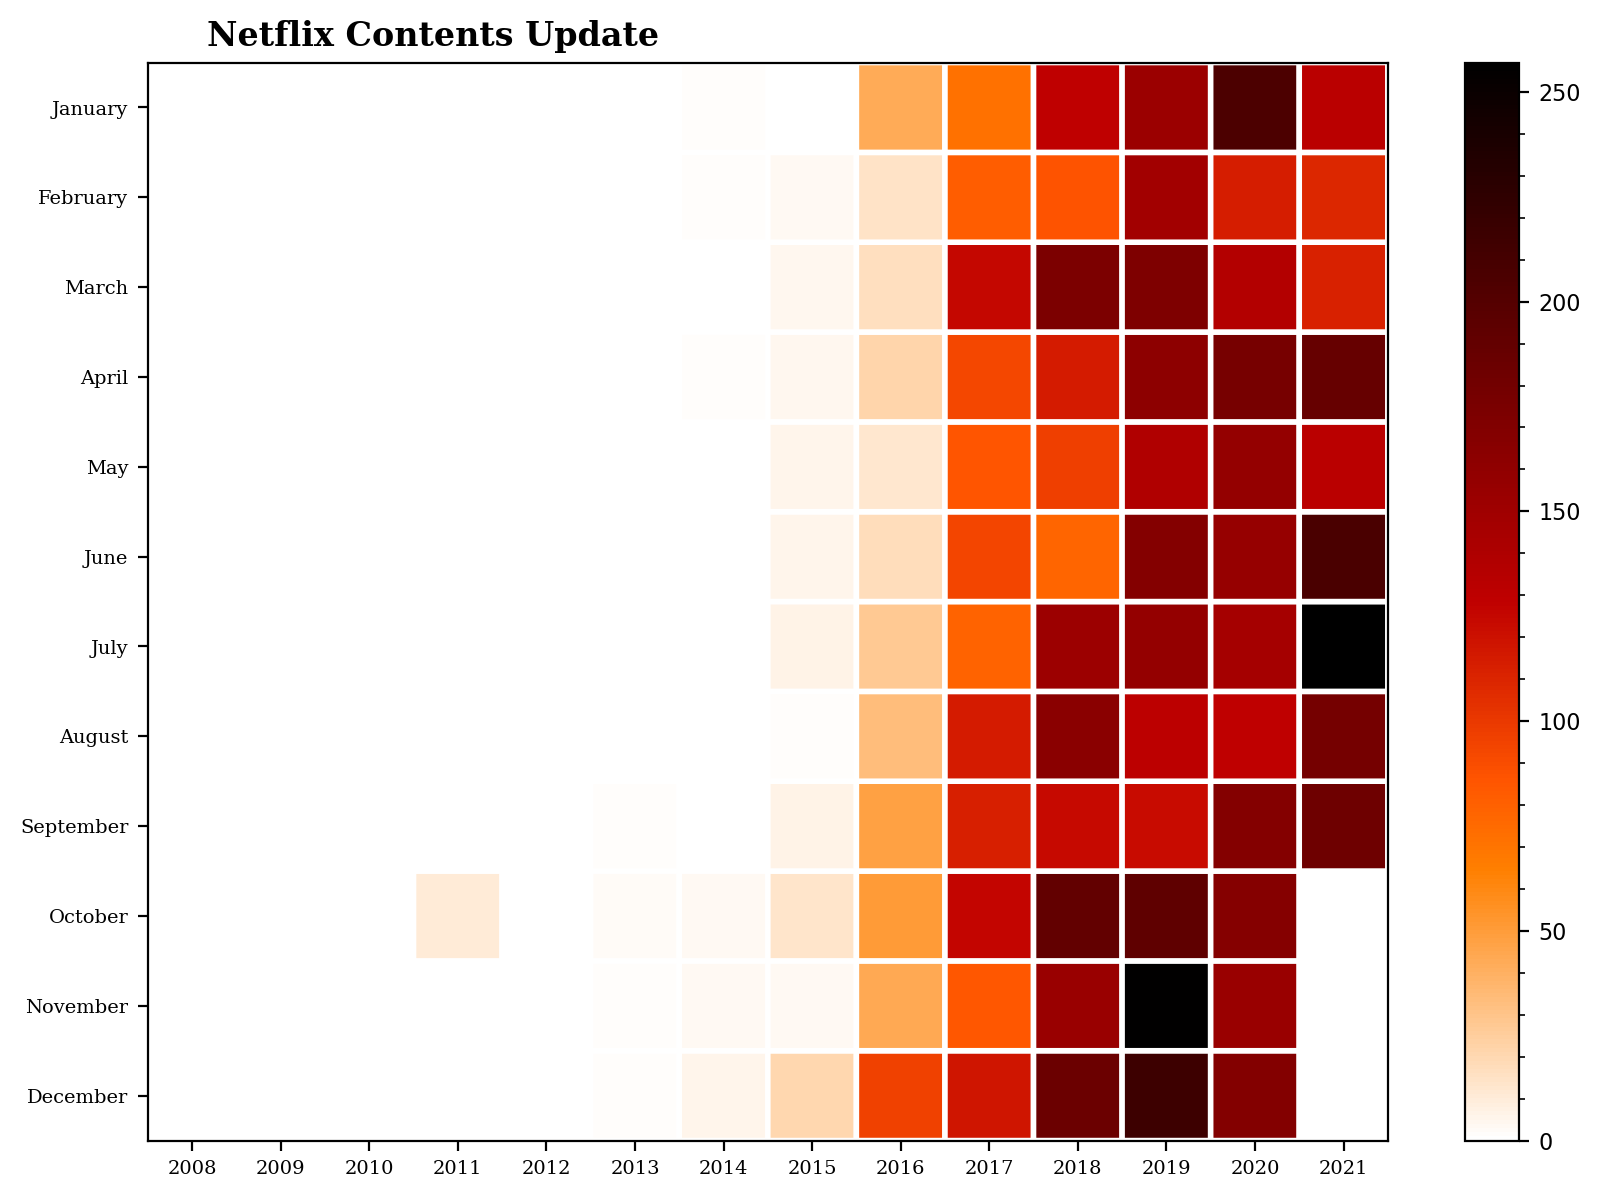

In [16]:
plt.figure(figsize=(10, 7), dpi=200)
plt.pcolor(df, cmap='gist_heat_r', edgecolors='white', linewidths=2) # heatmap
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns, fontsize=7, fontfamily='serif')
plt.yticks(np.arange(0.5, len(df.index), 1), df.index, fontsize=7, fontfamily='serif')

plt.title('Netflix Contents Update', fontsize=12, fontfamily='serif', fontweight='bold', position=(0.23, 1.0+0.02))
cbar = plt.colorbar()

cbar.ax.tick_params(labelsize=8) 
cbar.ax.minorticks_on()
plt.show()

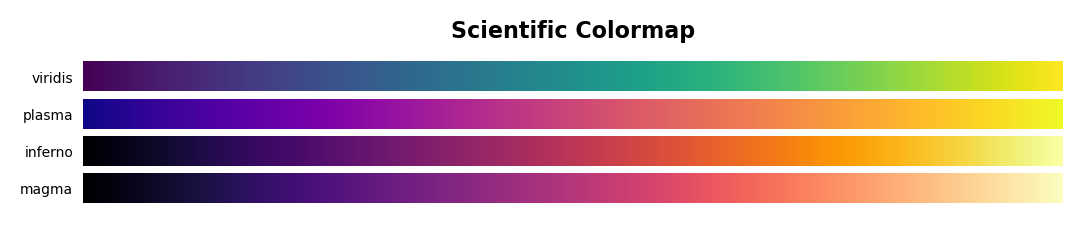

In [17]:
scientific_cmap = ('viridis', 'plasma', 'inferno', 'magma')
cmap_plot(scientific_cmap, 'Scientific')

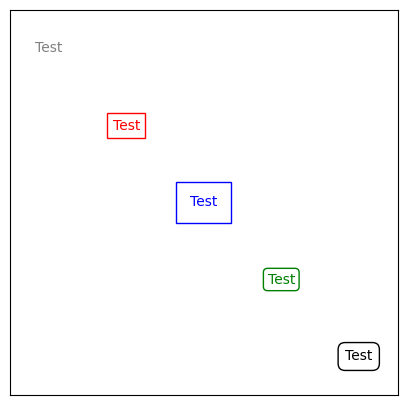

In [18]:
fig, ax = plt.subplots(figsize=(5, 5), dpi=100)

## Gray Box
ax.text(0.1, 0.9, 'Test', color='gray', va="center", ha="center")

## Red Box
ax.text(0.3, 0.7, 'Test', color='red', va="center", ha="center",
        bbox=dict(facecolor='none', edgecolor='red'))

## Blue Box
ax.text(0.5, 0.5, 'Test', color='blue', va="center", ha="center",
        bbox=dict(facecolor='none', edgecolor='blue', pad=10.0))

# Green Box
ax.text(0.7, 0.3, 'Test', color='green', va="center", ha="center",
        bbox=dict(facecolor='none', edgecolor='green', boxstyle='round'))

# Black
ax.text(0.9, 0.1, 'Test', color='black', va="center", ha="center",
        bbox=dict(facecolor='none', edgecolor='black', boxstyle='round, pad=0.5'))

ax.set_xticks([])
ax.set_yticks([])

plt.show()

In [10]:
netflix_titles = pd.read_csv("netflix_titles.csv")

In [11]:
# preprocessing
sns.set_style('whitegrid') # plot with grid

movie = netflix_titles[netflix_titles['type'] == 'Movie']    
rating_order =  ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']
movie_rating = movie['rating'].value_counts()[rating_order]    

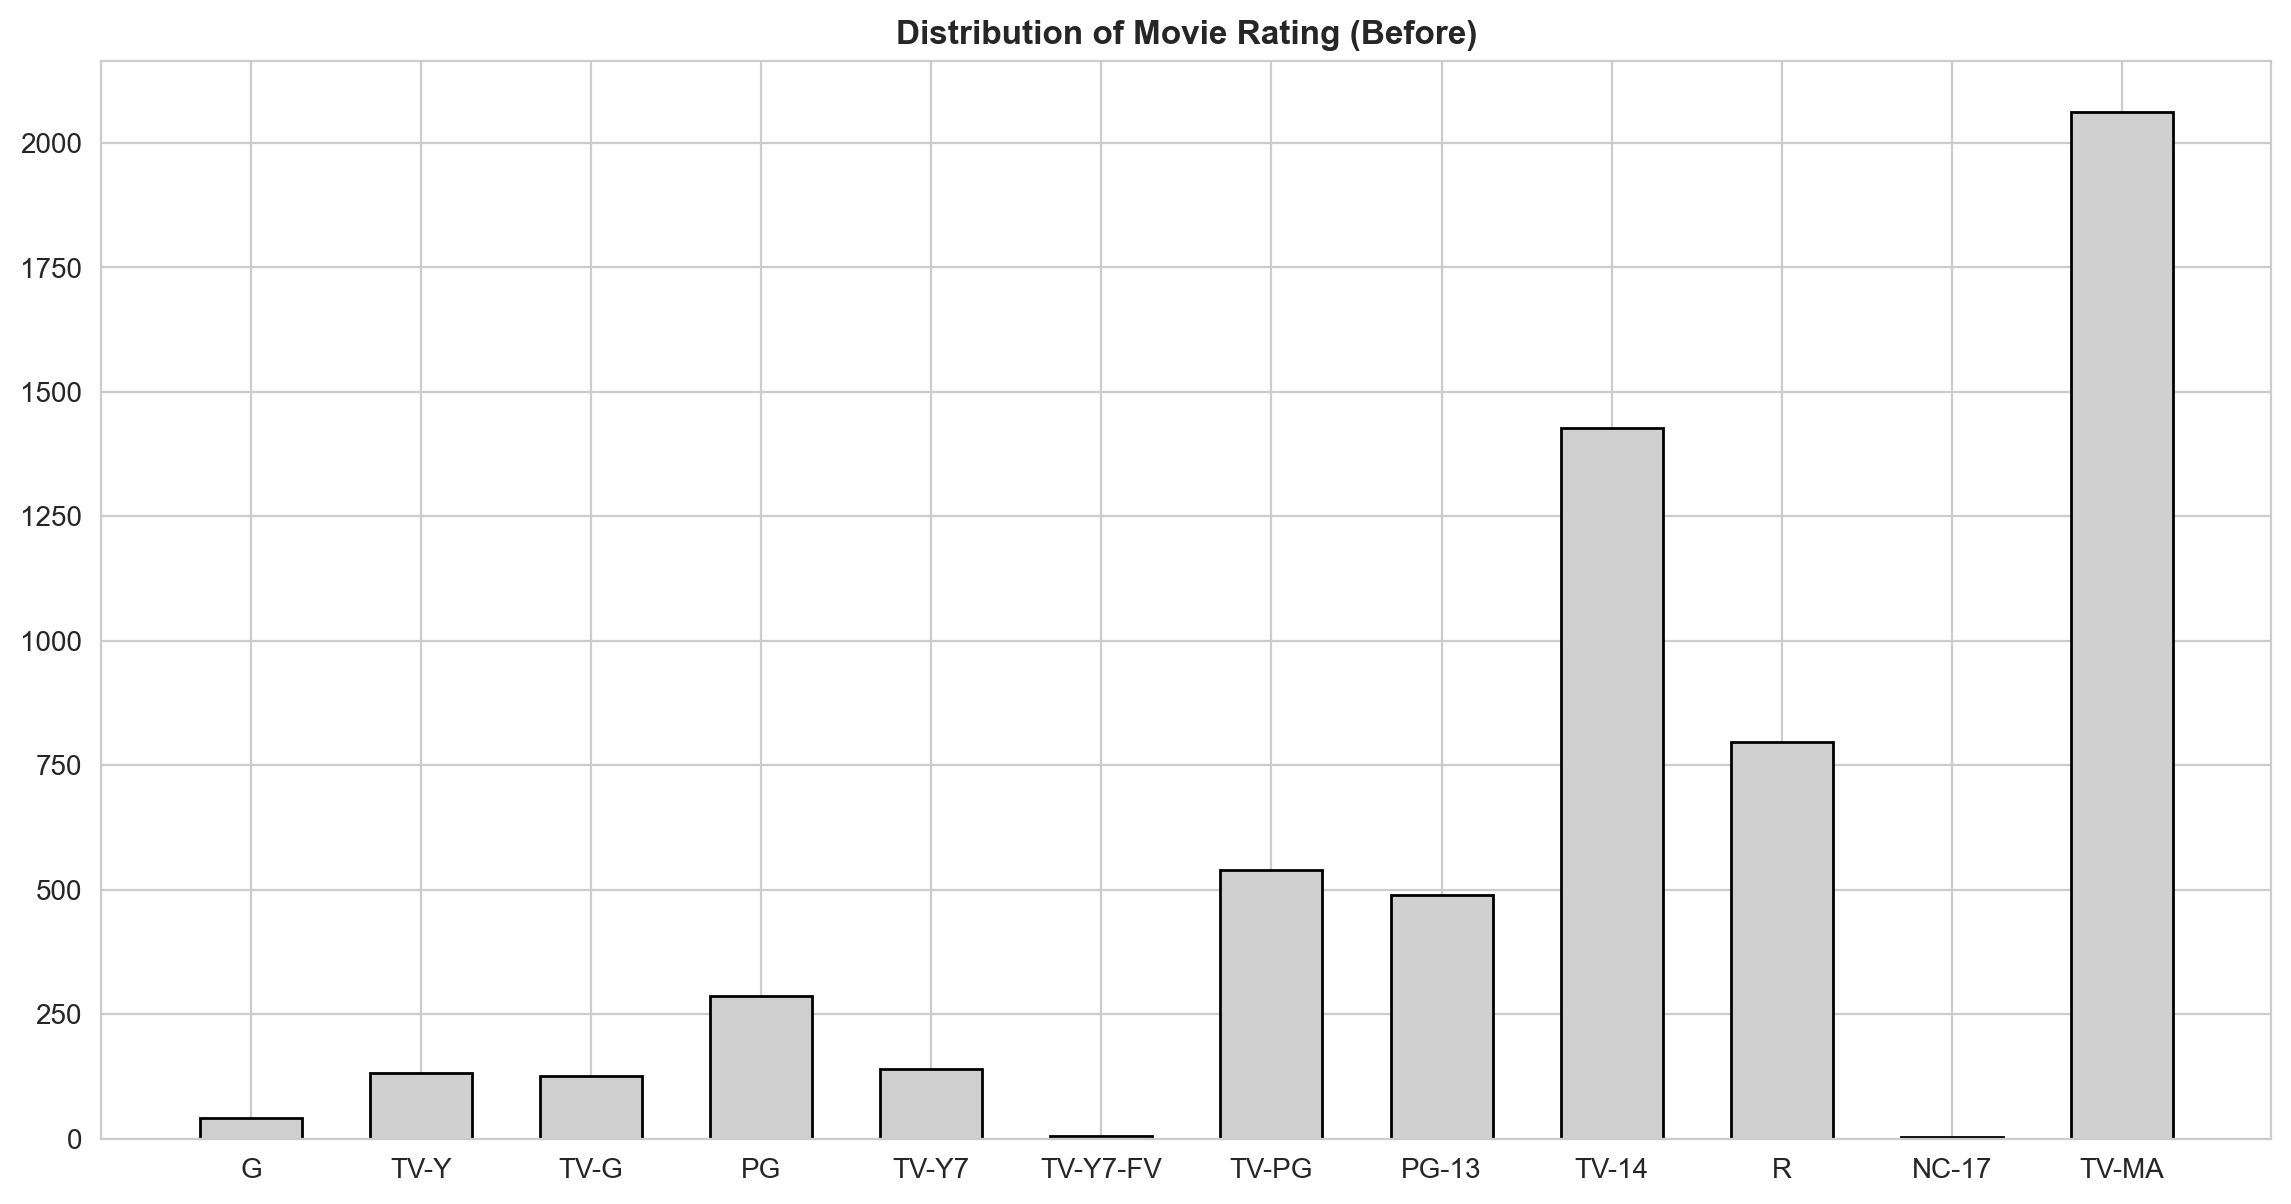

In [13]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(14, 7), dpi=200)
ax.bar(movie_rating.index, movie_rating,  color="#d0d0d0", width=0.6, edgecolor='black')
ax.set_title(f'Distribution of Movie Rating (Before)', fontweight='bold')
plt.show()

If you just use span and add text, you can change it as follows.
(The title bold processing is below.)

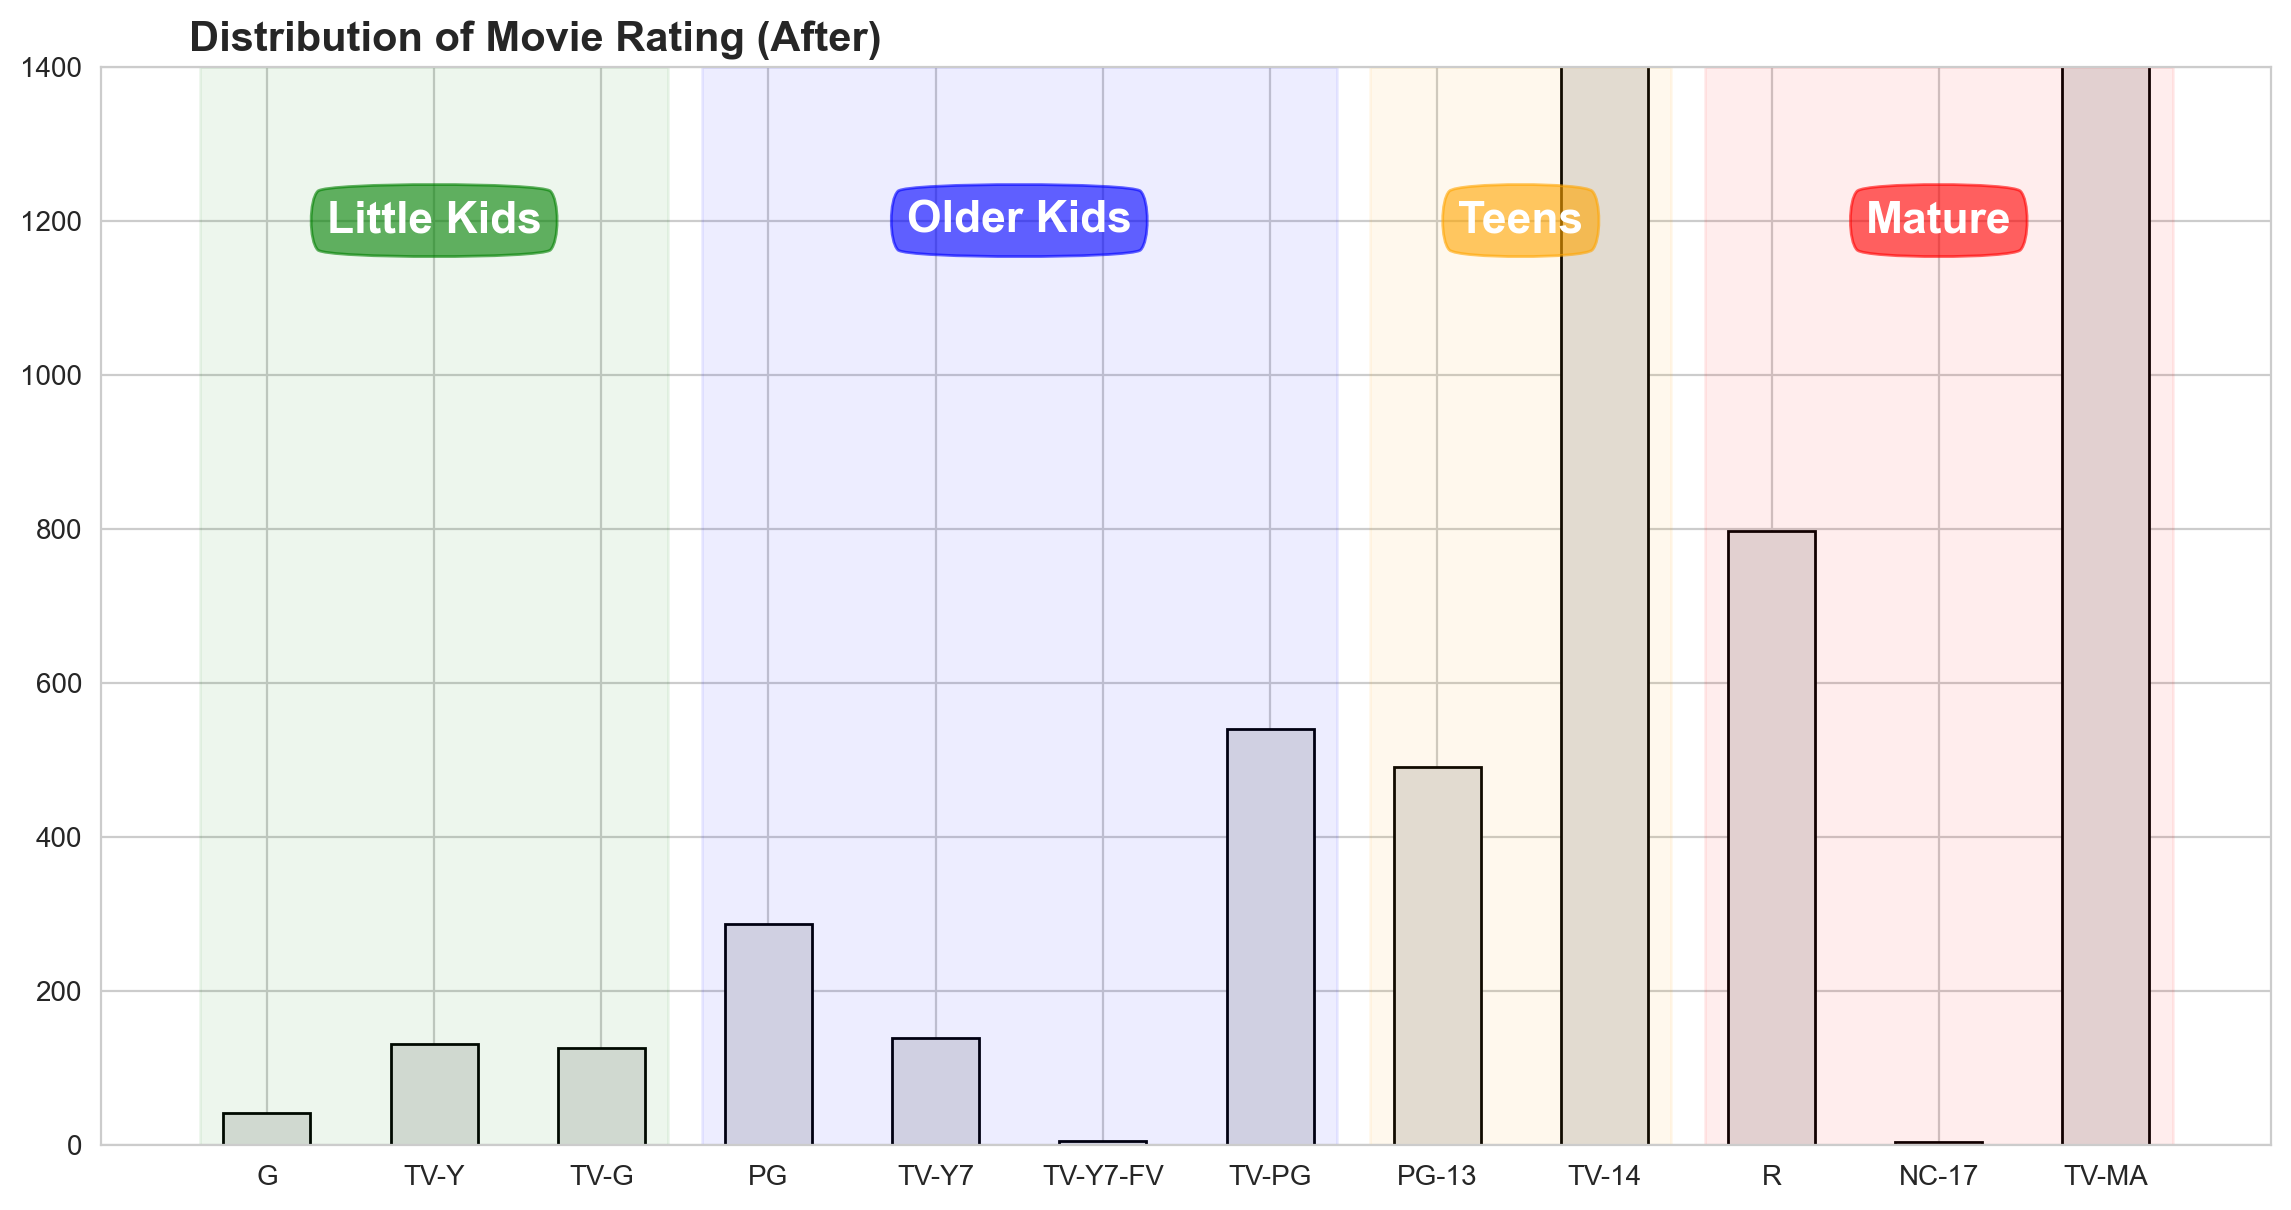

In [14]:
# original code : https://www.kaggle.com/subinium/storytelling-with-data-netflix-ver


def rating_barplot(data, title, height, h_lim=None):
    fig, ax = plt.subplots(1,1, figsize=(14, 7), dpi=200)
    if h_lim :
        ax.set_ylim(0, h_lim)
    ax.bar(data.index, data,  color="#e0e0e0", width=0.52, edgecolor='black')

    color =  ['green',  'blue',  'orange',  'red']
    span_range = [[0, 2], [3,  6], [7, 8], [9, 11]]

    for idx, sub_title in enumerate(['Little Kids', 'Older Kids', 'Teens', 'Mature']):
        ax.annotate(sub_title,
                    xy=(sum(span_range[idx])/2 ,height),
                    xytext=(0,0), textcoords='offset points',
                    va="center", ha="center",
                    color="w", fontsize=16, fontweight='bold',
                    bbox=dict(boxstyle='round4', pad=0.4, color=color[idx], alpha=0.6))
        ax.axvspan(span_range[idx][0]-0.4,span_range[idx][1]+0.4,  color=color[idx], alpha=0.07)
    ax.set_title(f'Distribution of {title} Rating (After)', fontsize=15, fontweight='bold', position=(0.20, 1.0+0.03))
    plt.show()
    


rating_barplot(movie_rating,'Movie', 1200, 1400)

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font fam

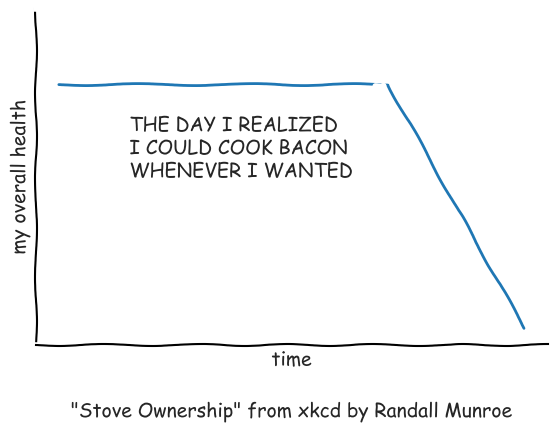

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Use XKCD style
plt.xkcd()

# Create figure
fig = plt.figure()
ax = fig.add_axes((0.1, 0.2, 0.8, 0.7))
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.set_xticks([])
ax.set_yticks([])
ax.set_ylim([-30, 10])

# Data for plot
data = np.ones(100)
data[70:] -= np.arange(30)

# Annotation
ax.annotate(
    'THE DAY I REALIZED\nI COULD COOK BACON\nWHENEVER I WANTED',
    xy=(70, 1), arrowprops=dict(arrowstyle='->'), xytext=(15, -10)
)

ax.plot(data)

# Labels
ax.set_xlabel('time')
ax.set_ylabel('my overall health')
fig.text(
    0.5, 0.05,
    '"Stove Ownership" from xkcd by Randall Munroe',
    ha='center'
)

# Show plot
plt.show()


findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font fam

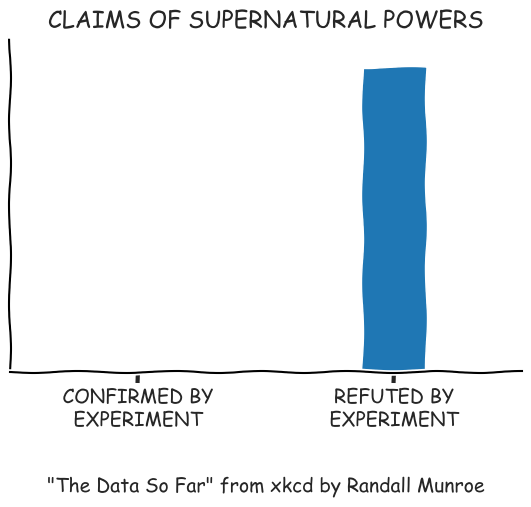

In [16]:
with plt.xkcd():
    # Based on "The Data So Far" from XKCD by Randall Munroe
    # https://xkcd.com/373/

    fig = plt.figure()
    ax = fig.add_axes((0.1, 0.2, 0.8, 0.7))
    ax.bar([0, 1], [0, 100], 0.25)
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['CONFIRMED BY\nEXPERIMENT', 'REFUTED BY\nEXPERIMENT'])
    ax.set_xlim([-0.5, 1.5])
    ax.set_yticks([])
    ax.set_ylim([0, 110])

    ax.set_title("CLAIMS OF SUPERNATURAL POWERS")

    fig.text(
        0.5, -0.05,
        '"The Data So Far" from xkcd by Randall Munroe',
        ha='center')

plt.show()

> I am writing a book in Korea for [Data Visualization Using Python Library]. I'll be writing books soon and sharing example kernels, so look forward to it.

In [27]:
pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu


Looking in indexes: https://download.pytorch.org/whl/cpu
     ---------------------------------------- 0.0/6.2 MB ? eta -:--:--
     ----------------------- ---------------- 3.7/6.2 MB 19.9 MB/s eta 0:00:01
     ----------------------------------- ---- 5.5/6.2 MB 13.4 MB/s eta 0:00:01
     ---------------------------------------- 6.2/6.2 MB 12.2 MB/s eta 0:00:00
     ---------------------------------------- 0.0/536.2 kB ? eta -:--:--
     ---------------------------------------- 536.2/536.2 kB ? eta 0:00:00
INFO: pip is looking at multiple versions of networkx to determine which version is compatible with other requirements. This could take a while.
     ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
     ---------------------------------------- 1.6/1.6 MB 29.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/206.4 MB ? eta -:--:--
    --------------------------------------- 2.9/206.4 MB 21.0 MB/s eta 0:00:10
   - -------------------------------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [29]:
pip install --upgrade typing_extensions


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install transformers


   ---------------------------------------- 0.0/10.0 MB ? eta -:--:--
   -------------- ------------------------- 3.7/10.0 MB 21.8 MB/s eta 0:00:01
   ------------------------ --------------- 6.0/10.0 MB 15.4 MB/s eta 0:00:01
   ----------------------------- ---------- 7.3/10.0 MB 15.1 MB/s eta 0:00:01
   ---------------------------------------- 10.0/10.0 MB 13.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.4 MB ? eta -:--:--
   ---------------------------------------- 2.4/2.4 MB 15.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import pandas as pd
import torch
from transformers import BertTokenizer, BertModel
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize

# Load BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

def get_bert_embedding(text):
    """Get the mean-pooled BERT embedding instead of using just CLS token"""
    inputs = tokenizer(text, return_tensors='pt', padding=True, truncation=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
    embedding = outputs.last_hidden_state.mean(dim=1)  # Mean pooling instead of CLS token
    return embedding.numpy()

def preprocess_data(df):
    df['description'] = df['description'].fillna('')
    df['listed_in'] = df['listed_in'].fillna('')
    df['content'] = df['title'] + ' ' + df['listed_in'] + ' ' + df['description']
    return df

def train_model(df):
    """Hybrid model: Use TF-IDF weighting along with BERT embeddings"""
    tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
    tfidf_matrix = tfidf.fit_transform(df['content']).toarray()
    
    bert_embeddings = np.array([get_bert_embedding(text) for text in df['content']])
    bert_embeddings = bert_embeddings.squeeze()
    
    # Normalize embeddings for better similarity calculations
    tfidf_matrix = normalize(tfidf_matrix)
    bert_embeddings = normalize(bert_embeddings)
    
    # Combine TF-IDF with BERT embeddings (Hybrid approach)
    combined_features = np.hstack((tfidf_matrix, bert_embeddings))
    
    # Compute cosine similarity
    cosine_sim = cosine_similarity(combined_features)
    
    return cosine_sim

def get_recommendations(title, df, cosine_sim, top_n=10):
    indices = pd.Series(df.index, index=df['title']).drop_duplicates()
    idx = indices.get(title)
    
    if idx is None:
        return "Movie not found in database."
    
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n + 1]
    
    movie_indices = [i[0] for i in sim_scores]
    return df['title'].iloc[movie_indices]

# Load dataset
df = pd.read_csv('netflix_titles.csv')
df = preprocess_data(df)
cosine_sim = train_model(df)

# Example: Get recommendations for a specific movie
title = "Inception"  # Change this to any movie title in dataset
recommendations = get_recommendations(title, df, cosine_sim, top_n=10)
print(recommendations)


7283    Legend of the Naga Pearls
7328                      Lockout
946                      Stargate
610                    Underworld
3816            See You Yesterday
5474                         Arès
886              The Mystic River
4023        The Land of Hypocrisy
5446                  Lucid Dream
2556                   In Paradox
Name: title, dtype: object
